<a href="https://colab.research.google.com/github/aahFancyGun/dataScienceClass/blob/master/unit3/YangChauU3Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Housing Data Model#

#Introduction#

##Methods##

- The metric for this model will be the sales ratio of all listed houses in the data
 - The sales ratio is calculated by dividing the appraised value of the house by the actual price the house was sold for
 - I am assuming that the chance of a specific sales ratio happening is independent of factors that might normally be imperative such as location and regional amentities
 - Data was sourced from an official publication by the State of Connecticut on housing prices from 2001 - 2022
    - Only sales from the year 2022 will be modeled in this project

##Context##

- 6.8 million housing units would be required to succesfully house all low-income families
- 580,000 people are believed to be homeless
- The majority of low income families pay the majority of their check towards either renting or paying off their home
- Only 25% of the people who apply for housing assistance recieve that assistance due to underfunded programs
- With the housing crisis in full swing its becoming more and more important for prospective house owners and sellers to understand the state of the market and what prices they can expect
- Homes and their prices are multifaceted factors in an individual's life with their housing situation often playing a major part in the opportunities available to them



In [ ]:
!pip install "preliz[full,notebook]"

In [ ]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
url = "https://raw.githubusercontent.com/aahFancyGun/dataScienceClass/master/unit3/Real_Estate_Sales_2001-2022_GL.csv"

housing_data = pd.read_csv(url)

housing_data

,Unnamed: 0,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,641887,90462,2009,03/12/2010,New Haven,140 FARREN AV,128240.0,17500.0,7.328000,Single Family,Single Family,13 - Bankrupcy,NaN,NaN,NaN
1,895979,150210,2015,04/28/2016,Simsbury,6 STRATTON FOREST WAY,170870.0,239900.0,0.712255,Condo,Condo,25 - Other,PUD ESTATE SALE,NaN,NaN
2,111372,210431,2021,12/15/2021,Norwalk,11 COSSITT RD,290990.0,580000.0,0.501700,Residential,Single Family,NaN,5-74-76-0,NaN,POINT (-73.438337032 41.098735012)
3,340935,30111,2003,06/03/2004,Thomaston,331 ATWOOD RD,98030.0,248000.0,0.395282,NaN,NaN,NaN,NaN,NaN,NaN
4,621526,90158,2009,11/05/2009,Bridgeport,2612 NORTH AVENUE UB4,135210.0,170500.0,0.793021,Condo,Condo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,545940,61636,2006,08/31/2007,Norwalk,8 HORTON ST,183820.0,350000.0,0.525200,Single Family,Single Family,NaN,NaN,NaN,NaN
99996,798309,140602,2014,06/02/2015,Danbury,46 JEFFERSON AVE,117800.0,175197.0,0.672386,Single Family,Single Family,NaN,H16134,NaN,NaN
99997,541685,70751,2007,02/27/2008,Bridgeport,33 BOSTON TERR. #17,42211.0,234000.0,0.180389,Condo,Condo,NaN,NaN,NaN,NaN
99998,854663,15099,2015,12/21/2015,Farmington,21 TAINE MT RD,259170.0,382000.0,0.678455,Single Family,Single Family,NaN,NaN,NaN,POINT (-72.90129 41.75818)


In [ ]:
housing_data_2022 = housing_data.query('`List Year` == 2022')

housing_data_2022 = housing_data_2022.query('`Sales Ratio` < 2')

housing_data_2022

,Unnamed: 0,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
8,155974,220240,2022,09/05/2023,Rocky Hill,279 WESTERLY TERRACE,189980.0,386000.0,0.4921,Residential,Single Family,NaN,NaN,NaN,POINT (-72.684539991 41.665812)
81,164944,2201141,2022,06/26/2023,Stamford,149 FISHING TRAIL,460855.0,735000.0,0.6270,Residential,Single Family,14 - Foreclosure,NaN,NaN,POINT (-73.562721039 41.147776982)
107,3497,22126,2022,05/01/2023,Monroe,3 SPINNING WHEEL ROAD,251500.0,560000.0,0.4491,Residential,Single Family,NaN,NaN,NaN,POINT (-73.18970204 41.335190009)
114,3977,22012,2022,10/11/2022,Monroe,136 FAR HORIZON DRIVE,239300.0,471000.0,0.5080,Residential,Single Family,NaN,NaN,NaN,POINT (-73.223589991 41.32780002)
125,143728,220763,2022,07/19/2023,Greenwich,CAMBRIDGE DRIVE 0026,513450.0,1200000.0,0.4278,Residential,Single Family,25 - Other,ESTATE SALE,NaN,POINT (-73.668034036 41.029867996)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99884,159700,220242,2022,03/03/2023,Shelton,27 STEPHENS TERRACE,84210.0,135000.0,0.6237,Residential,Condo,NaN,105 81 27,NaN,POINT (-73.171079372 41.35410452)
99901,157575,220218,2022,07/31/2023,Windsor Locks,24 DEXTER RD,100520.0,231500.0,0.4342,Residential,Single Family,NaN,NaN,NaN,POINT (-72.62884501 41.920474)
99902,151350,220121,2022,07/17/2023,Portland,63 MOUNTAIN LAUREL WAY,112560.0,615000.0,0.1830,Residential,Single Family,07 - Change in Property,111-0014-17,NEW CONSTRUCTION,POINT (-72.590007965 41.626424013)
99903,163927,220485,2022,09/08/2023,Trumbull,142 BEARDSLEY PARKWAY,292670.0,616000.0,0.4751,Residential,Single Family,NaN,NaN,NaN,POINT (-73.175325987 41.224764009)


In [ ]:
indiv_housing = housing_data_2022[["Sales Ratio"]].copy()

indiv_housing



,Sales Ratio
8,0.4921
81,0.6270
107,0.4491
114,0.5080
125,0.4278
...,...
99884,0.6237
99901,0.4342
99902,0.1830
99903,0.4751


#Likelihood (graph of distribution of observed data)#

- An interesting quirk of the data I gathered is that certain values of sales ratios ballooned up to incredibly high numbers
    - To combat this, I chose to truncate datapoints with a value above a certain threshold because these outlying data points constitute a negligible percentage of the total data
    - Their existence also made plotted data almost unreadable




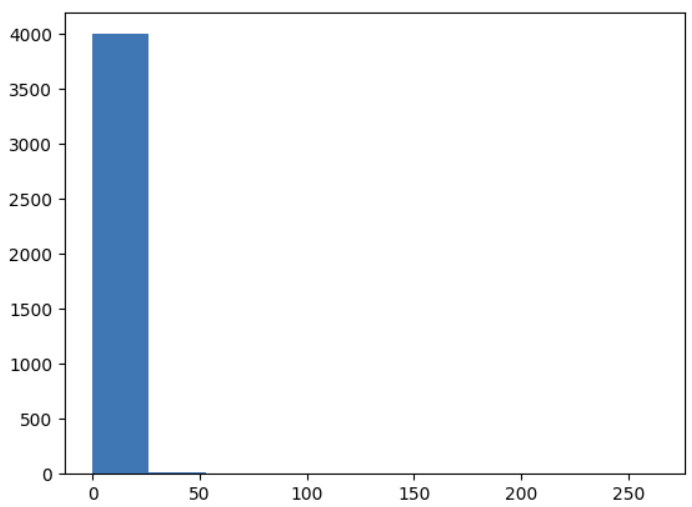

pre-truncated data distribution

(array([ 103.,  616., 2276.,  611.,  174.,   86.,   26.,   15.,   14.,
           8.]),
 array([0.     , 0.19902, 0.39804, 0.59706, 0.79608, 0.9951 , 1.19412,
        1.39314, 1.59216, 1.79118, 1.9902 ]),
 <BarContainer object of 10 artists>)

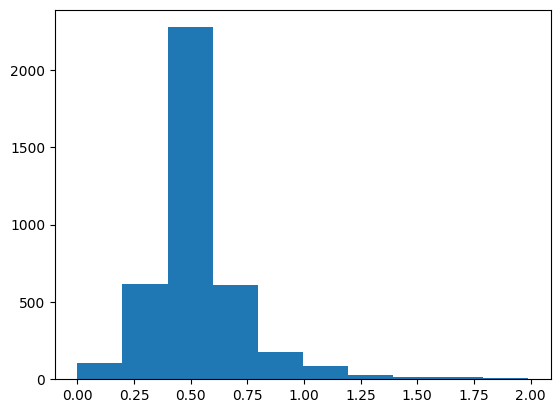

In [ ]:
plt.hist(indiv_housing)

In [ ]:
indiv_housing.max(0)

Sales Ratio    1.9902
dtype: float64

In [ ]:
most_frequent = indiv_housing['Sales Ratio'].value_counts()

most_frequent

print(np.any(indiv_housing == 0))  # Check for any zeros in the observed data
indiv_housing = indiv_housing[indiv_housing != 0]
print(np.any(indiv_housing < 0))


True
False


#Priors, Failures, and Posterior Predictive#

##Prior 1##

- The majority of my knowledge comes from horror stories I hear from parental figures so I chose uniform to represent my beliefs on this topic
    - Corporations buying out homes from poor and desperate families for extremely low prices
    - Apparently no one they know can afford a home anymore
    - Based off that, I'll assume that a majority of the time a company will be the one making a purchase
    - At a minimum they will be able to purchase that house for as low as 9 times lower than its market value all the way down to 15 times lower than its market value
    - This prior ends up getting overridden by my data points

##Prior 2##

- Used gamma to model where my posterior predictive's peak will be as well as how it changes
    - Alpha (shape parameter): I believed that generally, the sales ratio for which a house is purchased will be grouped uniformly with little standard deviation, which is why I chose 13, an abitrarily high number
    - Beta (rate parameter): This defines how fast I think the dsitribution of the housing crisis will decrease. Because I believe that generally, the housing will be grouped around the mean, I chose 14 as another abitrarily high number to maximize downward slope.
    - This prior ends up being pretty spot on with my observed data

##Former Prior##

- Before using gamma, I initially used an exponential distribution to model the alpha argument of the inverse gamma function
  - Only has one argument (either lam or beta), both of which set the scaling of a function
  - I wanted to model my prediction of what the variance of the data would be as well, and exponential does not have an argument that allows me to do that

##Attempted Models (Images included below Description)##

###Poisson###

 - The first model I tried was Poisson, which proved to be a failure.
 - Because it only has one argument it could not correctly capture all elements of my observed data, causing it to fail at a producing predictions that lined up with real world information


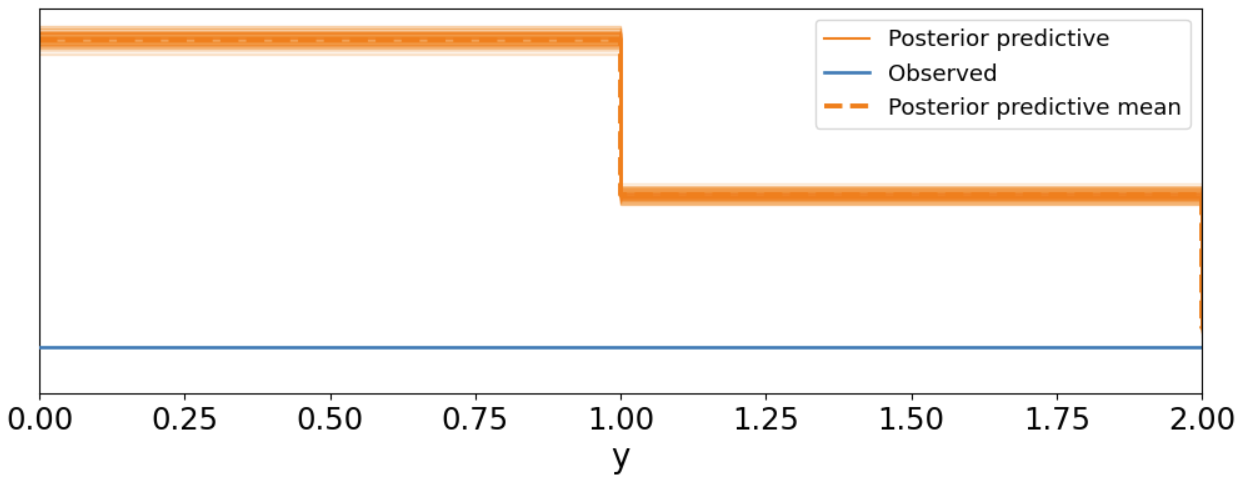

###Asymmetric Laplace###

 - This model was sort of a last minute attempt to improve on inverse gamma
 - Asymmetric Laplace requires at least three parameters (either kappa, mu and b or q, mu and b)
 - both kappa and q encode how symmetric a graph will be about its mean
 - mu determines location (mean)
 - b is the scaling parameter
 - Failed to produce better results
  - When I started I formed two  beliefs that I wanted to use as priors
    - This distribution requires symmetry in addition to location and scaling
    - Because I didn't have much knowledge about housing, I was unsure of how to form a prior that encapsulated my belief for the symmetry of how sales ratios would be modeled

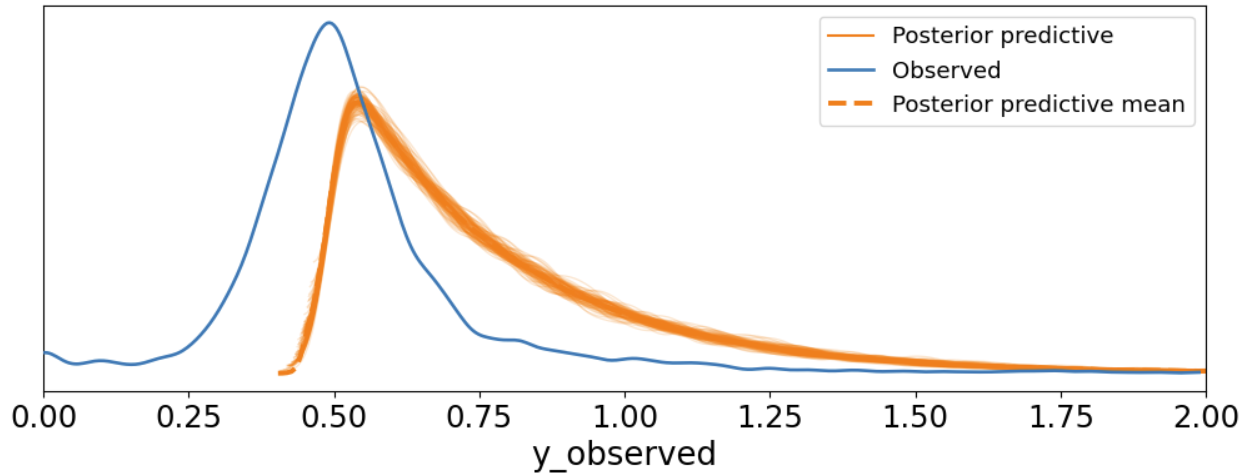

###SkewStudentT###

 - Another attempt at creating a better fit than inverse gamma
  - Able to set skew using a and b arguments (matches well with the slight skew in my data)
  - Sigma (scaling), Mu (location)
  - Close contender with inverse gamma but some interesting occurances when sampling data from the predictive posterior meant inverse gamma won out

    - Mu Prior (Normal): created following research about the sales ratio of housing prices, so I had a better idea of where my model would be located and how it would be distributed
      - Mu (mean argument) set to 0.5, Sigma (standard deviation argument) set to 1.0, which was based off the relatively tight spread of sales ratio data online

    - Sigma Prior (Gamma): Because this distribution had success in Inverse Gamma I decided to keep it and simply modified it so it would be able to model my beliefs in SkewStudentT.
      - Alpha (shape argument) set to 0.13 to model skew to the right and Beta (scale argument) set to 13 to model a very high peak
    
    - A and B prior (Normal): A controls the skew of the function while B control the kurtosis.
      - Mu and Sigma for both A and B were set to 2 because both kurtosis and skew were somewhat significant
        - Data skewed right with a long tail indicating a higher kurtosis
        - Also, as mentioned earlier, I had to truncate outliers with rediculously high numbers


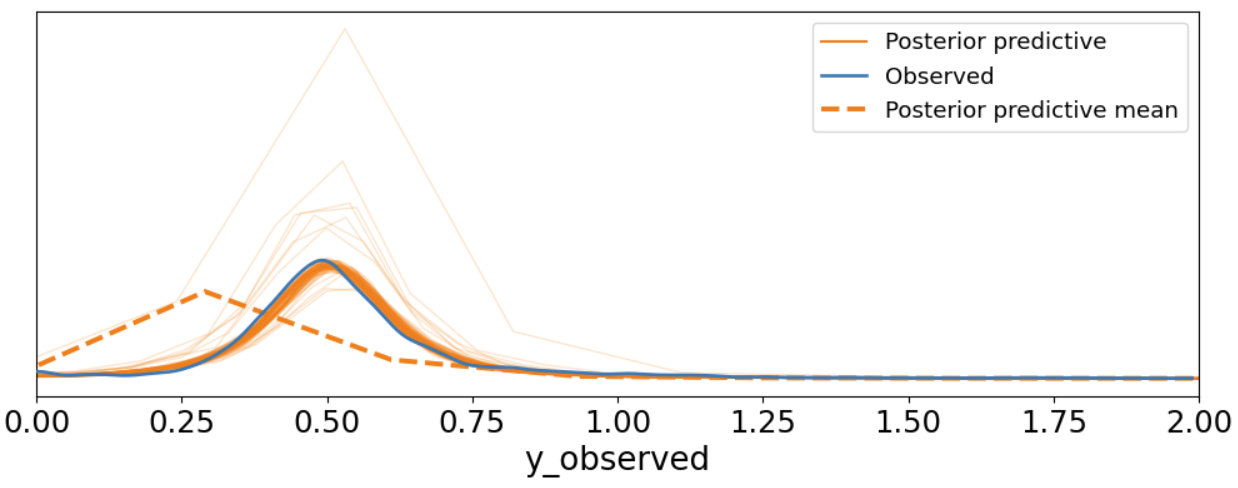

In [ ]:
with pm.Model() as housing_ft_model:

    # Define the priors with better lower bound for Uniform and valid range
    uniform_prior = pm.Uniform('beta', lower=9, upper=15)

    gamma_prior = pm.Gamma('alpha', alpha=13, beta=14)

    # Defining the likelihood using InverseGamma
    y = pm.InverseGamma('y', alpha=gamma_prior, beta=uniform_prior, observed=indiv_housing)

    housing_ft_model.debug()

    idata_housing = pm.sample(100)

c:\Users\aahfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pymc\model\core.py:1366: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


point={'beta_interval__': array(0.), 'alpha_log__': array(-0.07410794), 'y_unobserved_log__': array([1.8281271, 1.8281271, 1.8281271, 1.8281271, 1.8281271, 1.8281271,
       1.8281271, 1.8281271, 1.8281271, 1.8281271, 1.8281271, 1.8281271])}

No problems found


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, y_unobserved]


Output()

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 180 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


array([<Axes: title={'center': 'beta'}>,
       <Axes: title={'center': 'alpha'}>], dtype=object)

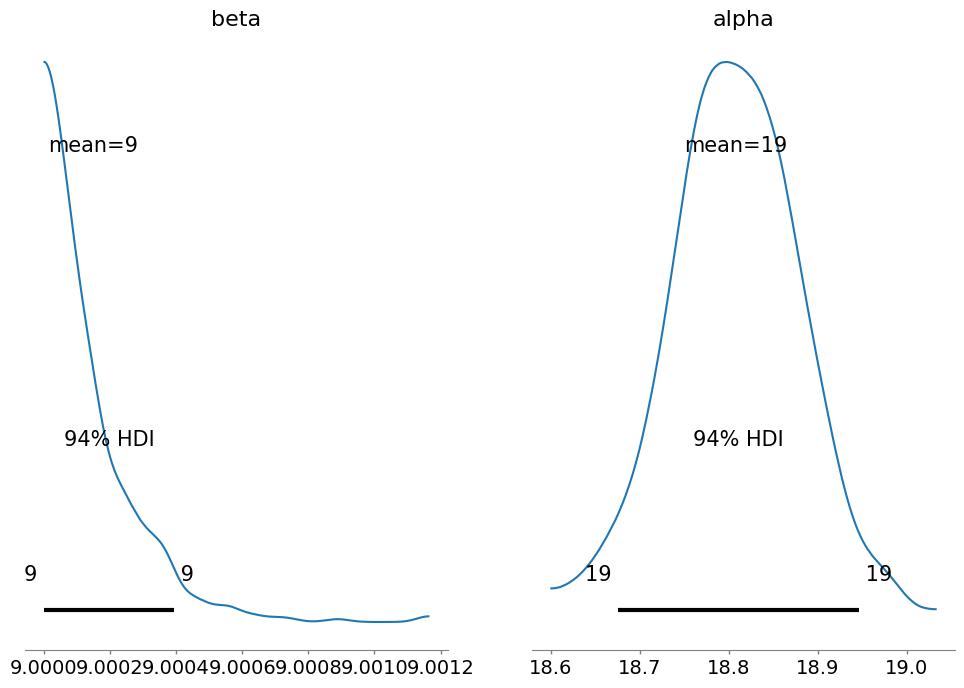

In [ ]:
az.plot_posterior(idata_housing, figsize=(12, 8), var_names=["beta", "alpha"])

In [ ]:
pm.sample_posterior_predictive(idata_housing, model=housing_ft_model, extend_inferencedata=True)

Sampling: [y_observed]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 2.0)

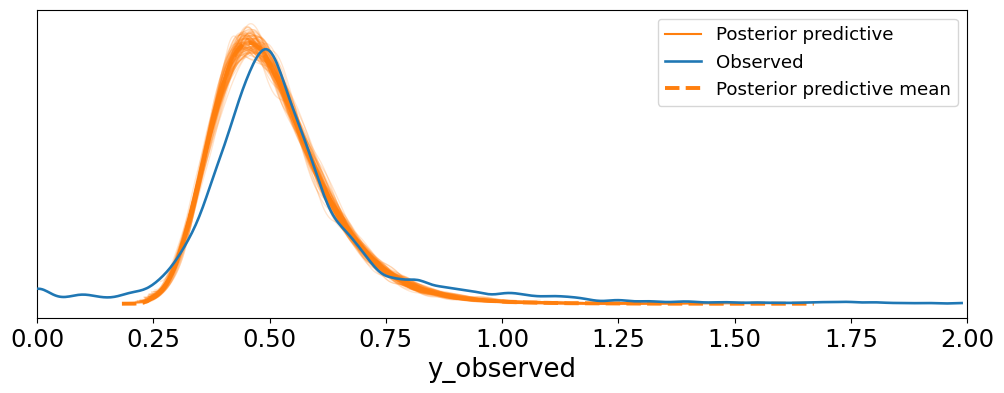

In [ ]:
az.plot_ppc(idata_housing, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
plt.xlim(0, 2)

#Analysis and Parting thoughts#

##Analysis##

Although the posterior predictive lines up decently with the observed data I'm very curious as to how its able to do so when the arguments I gave the to the priors were extremly skewed up compared to this

 - My uniform prior wouldve modeled something completely different from what the posterior predictive ended up being. With a lower value at 9 and a upper value set to 15 this distribution wouldn't have even showed up within the scale of this chart

 - My best explanation as to why this occured is that the amount of data (4000 instances) I had simply skewed the posterior in favor of the general location of the observed data (mean of around 0.5)

 - The alpha, or shape prior (gamma distribution) was pretty spot on with the variance (standard deviation) of housing ratios in the real world with most of the datapoints hovering around the 0.5 point with a steep slope downards on both sides

 - Notably, the posterior predictive is more capable of guessing scenarios from ~0.5 onwards but suffers in accuracy when compared to actual data if considered from ~0.5 backwards.

 - Natural skew of InverseGamma to the right was useful to model the kurtosis of the observed data (Originally had extremely high outlying numbers to the right)

